In [ ]:
!git clone https://github.com/manicman1999/StyleGAN2-Tensorflow-2.0.git
!mv ./StyleGAN2-Tensorflow-2.0/* .
!rm -r StyleGAN2-Tensorflow-2.0

Cloning into 'StyleGAN2-Tensorflow-2.0'...
remote: Enumerating objects: 58, done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (58/58), done.


In [ ]:
!mkdir Models
!mkdir Results
!mkdir data
!mkdir vectors
!rm -r sample_data

In [ ]:
!gdown --id 1GOjghy2kKLC3EfLhTF2BntYPoPjXgUGn
!unzip LandscapesBig.zip -d Models/
!rm LandscapesBig.zip

Downloading...
From: https://drive.google.com/uc?id=1GOjghy2kKLC3EfLhTF2BntYPoPjXgUGn
To: /content/LandscapesBig.zip
156MB [00:01, 90.9MB/s]
Archive:  LandscapesBig.zip
  inflating: Models/dis.json         
  inflating: Models/dis_28.h5        
  inflating: Models/gen.json         
  inflating: Models/gen_28.h5        
  inflating: Models/genMA.json       
  inflating: Models/genMA_28.h5      
  inflating: Models/sty.json         
  inflating: Models/sty_28.h5        
  inflating: Models/styMA.json       
  inflating: Models/styMA_28.h5      


In [ ]:
!pip install tensorflow==2.0
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 86.3MB 35kB/s 
     |████████████████████████████████| 3.8MB 54.7MB/s 
     |████████████████████████████████| 450kB 56.1MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3da7beb854da0a4faff252418aebd1f7f80bea47e7d2cb3caffa20fec6a8e3f8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tenso

In [ ]:
from stylegan_two import StyleGAN, noiseList, nImage, noise
import numpy as np

model = StyleGAN()
model.load(28)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1536)         3072        lambda[0][0]                     
__________________________________________________________________________________________________
reshape (Reshape)               (None, 4, 4, 96)     0           dense_5[0][0]                    
____________________________________________________________________________________________

In [ ]:
#Must upload latent and label vectors
w_latents_total = np.load("vectors/w_latents_total.npy")
labels_total = np.load("vectors/labels_total.npy")
w_latents_2 = np.load("vectors/w_latents(1).npy")
labels_2 = np.load("vectors/class_list(1).npy")
w_latents_3 = np.load("vectors/w_latents(3).npy")
labels_3 = np.load("vectors/class_list(3).npy")
w_latents = np.concatenate((w_latents_total, w_latents_2, w_latents_3))
labels = np.concatenate((labels_total, labels_2, labels_3))

print(w_latents.shape)
print(labels.shape)

label_names = np.array(['ground', 'plant', 'sky', 'solid', 'water', 'clouds', 'tepe', 'snow'])

num = len(label_names)
unique, counts = np.unique(labels, return_counts=True , axis=0)
print(unique)
print(counts)

(4500, 512)
(4500, 8)
[['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '1']
 ['0' '0' '0' ... '1' '0' '0']
 ...
 ['1' '1' '1' ... '1' '0' '1']
 ['1' '1' '1' ... '1' '1' '0']
 ['1' '1' '1' ... '1' '1' '1']]
[ 11   1   4   3 180   9   4   2   2  24   5  59  13   2   1   1  57   4
   4   2   6   2  30   8   3   3 116   9   6   8 216   6  13   5  58   9
  22   8  97  28  25   2  36   6   5   3  24   5   5  42   9 166   1  35
   4  21   5 378  11  38   4  35   1   9   6 104  22  10  24   1   1  82
   4  39   7  55   2   4   5  66  14  19   2 211   6  29   7 418  21  19
   4 105  22  15   9 219  39   1  61   4   5   1  82   3   7  45   9   2
   1  90  18   3   1  11   2   6   5   3  12   9   3  11   6   2  15   4
   2   5   6   3   3   4   2   7   1  11   4   9   2   2   1   4   3  20
   6   1   1  16   1  15   5   2  32   9   3   6   1  26  12   1   7   1
   4   1  26  16  10   2   3   2   5  30   4  18   2  15   6  14   3  48
   9   4   8   2   1   2  22   1   7   1  21   2   8   3

In [ ]:
# np.save("w_latents_total", w_latents)
# np.save("labels_total", labels)

In [ ]:
number = 100000
random_latent = np.random.normal(0.0, 1.0, size=[number, 512]).astype('float32')
w_random_latent = model.GAN.S.predict(random_latent, batch_size=64)
average = np.mean(w_random_latent, axis = 0)
centralized_w_random = w_random_latent - average

centralized_w_latents = w_latents - average
print(w_random_latent.shape)
print(average.shape)
print(centralized_w_random.shape)
print(centralized_w_latents.shape)

(100000, 512)
(512,)
(100000, 512)
(4500, 512)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


clf_list = []

for i in range(num):
  print(label_names[i])
  print(np.count_nonzero(np.array(labels[:, i], dtype=int)))
  clf_list.append(LogisticRegression(max_iter=10000))
  clf_list[i].fit(X=centralized_w_latents, y=labels[:, i])


ground
669
plant
3135
sky
2607
solid
1212
water
1948
clouds
3033
tepe
3719
snow
489


In [ ]:
predictions = []
probas = []

ortalamalar = []
maksimumlar = []

percentage = 0.90

for i in range(num):
  print(label_names[i])
  predictions.append(clf_list[i].predict(centralized_w_random))
  probas.append(clf_list[i].predict_proba(centralized_w_random)[:, 1])
  maksimumlar.append(centralized_w_random[np.argmax(probas[i])])
  ort = np.mean(centralized_w_random[np.nonzero(probas[i] > percentage)[0]], axis=0)
  print(ort.shape)
  ortalamalar.append(ort)


ground
(512,)
plant
(512,)
sky
(512,)
solid
(512,)
water
(512,)
clouds
(512,)
tepe
(512,)
snow
(512,)


In [ ]:
print((probas[i]*probas[i]).shape)
print(np.nonzero(probas[7] > percentage)[0])
print(((centralized_w_random.reshape(512, -1)@probas[i].reshape(-1, 1)).reshape(-1)).shape)

(100000,)
[  151   239   297 ... 99623 99714 99937]
(512,)


# Widget APP

In [ ]:
from PIL import Image
def generate_from_w2(self, style, noi = np.zeros([44]), trunc = 0.5):
        n_list = [style] * 7
        if noi.shape[0] == 44:
            noi = nImage(64)

        generated_images = self.GAN.GE.predict(n_list + [noi], batch_size = 16)
        generated_images = np.concatenate(generated_images, axis = 0)
        c1 = np.clip(generated_images, 0.0, 1.0)
        x = Image.fromarray(np.uint8(c1*255))


        return x

Get Latent directions

In [ ]:
from pathlib import Path
def get_control_latent_vectors():
    #files = [x for x in Path('vectors').iterdir() if str(x).endswith('.npy')]
    #latent_vectors = {f.name[:-4]:np.load(f) for f in files}
    latent_vectors = {label_names[i]:ortalamalar[i] for i in range(num)}
    return latent_vectors

In [ ]:
latent_controls = get_control_latent_vectors()
#len(latent_controls), latent_controls.keys()
print(len(latent_controls[label_names[0]]))

512


Create Sample image and return the image and its vector

In [ ]:
def img_from_latent():
  n2 = nImage(1)
  n_list = noiseList(1)
  test = model.generateTruncated(style= n_list, noi = n2, trunc = 1)
  test = np.concatenate(test, axis = 0)
  c1 = np.clip(test, 0.0, 1.0)
  x = Image.fromarray(np.uint8(c1*255))
  vector = model.GAN.S.predict(n_list[0])
  return x,vector

Approximating W center of mass


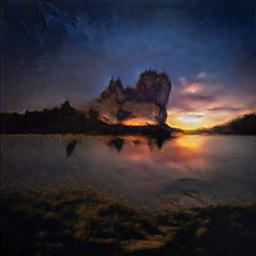

In [ ]:
np.random.seed(15)
image_to_use,latent_code_to_use = img_from_latent()
image_to_use

Codes For the Widget App

In [ ]:
import IPython
import ipywidgets as widgets

def generate_image_from_style(style):
  #n2 = nImage(1)
  n_list = [style] * 7
  test = model.generateTruncated(style= n_list, noi = n2, trunc = 1)
  test = np.concatenate(test, axis = 0)
  c1 = np.clip(test, 0.0, 1.0)
  x = Image.fromarray(np.uint8(c1*255))
  return x


def apply_latent_controls(self):
    
    image_outputs = controller.children[0]
    feature_sliders = controller.children[1]
    
    slider_hboxes = feature_sliders.children[:-2]
    latent_movements = [(x.children[1].value, x.children[0].value) for x in slider_hboxes]

    modified_latent_code = np.array(latent_code_to_use)
    w_vec = []
    w_vec = np.array(w_vec)
    style = np.zeros(512)
    #style = [modified_latent_code] * 7
    for feature, amount_to_move in latent_movements:      
        modified_latent_code += latent_controls[feature] * amount_to_move
    #   w_vec = np.append(w_vec,amount_to_move)
    #   print(latent_controls[feature])
    #   print(amount_to_move)
    # print(w_vec)
    #print(latent_controls[feature])
    latent_img = generate_from_w2(model, modified_latent_code, noi = n2)
    
    latent_img_output = image_outputs.children[1]
    with latent_img_output:
        latent_img_output.clear_output()
        display(latent_img)

def reset_latent_controls(self):
    
    image_outputs = controller.children[0]
    feature_sliders = controller.children[1]
    
    slider_hboxes = feature_sliders.children[:-2]
    for x in slider_hboxes:
        x.children[0].value = 0
        
    latent_img_output = image_outputs.children[1]
    with latent_img_output:
        latent_img_output.clear_output()
        display(image_to_use)

def create_interactive_latent_controller():
    orig_img_output = widgets.Output()

    with orig_img_output:
        orig_img_output.clear_output()
        display(image_to_use)

    latent_img_output = widgets.Output()

    with latent_img_output:
        latent_img_output.clear_output()
        display(image_to_use)

    image_outputs = widgets.VBox([orig_img_output, latent_img_output])

    #collapse-hide
    generate_button = widgets.Button(description='Generate', layout=widgets.Layout(width='75%', height='10%'))
    generate_button.on_click(apply_latent_controls)

    reset_button = widgets.Button(description='Reset Latent Controls', layout=widgets.Layout(width='75%', height='10%'))
    reset_button.on_click(reset_latent_controls)

    feature_sliders = []
    for feature in latent_controls:
        label = widgets.Label(feature)
        slider = widgets.FloatSlider(min=-5, max=5)
        feature_sliders.append(widgets.HBox([slider, label]))
    feature_sliders.append(generate_button)
    feature_sliders.append(reset_button)
    feature_sliders = widgets.VBox(feature_sliders)

    return widgets.HBox([image_outputs, feature_sliders])

In [ ]:
np.random.seed(1423)
n2 = nImage(1)
image_to_use,latent_code_to_use = img_from_latent()
#image_to_use
#print(latent_code_to_use)
controller = create_interactive_latent_controller()
controller

In [ ]:
def images_horizontally(imgs):
  imgs_comb = np.hstack( (np.asarray(i) for i in imgs ) )
  # save that beautiful picture
  imgs_comb = Image.fromarray(imgs_comb)
  return imgs_comb

def images_vertically(imgs):
  imgs_comb = np.vstack( (np.asarray(i) for i in imgs ) )
  # save that beautiful picture
  imgs_comb = Image.fromarray(imgs_comb)
  return imgs_comb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


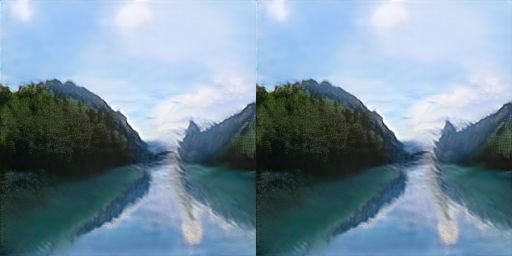

In [ ]:
image_to_use,latent_code_to_use = img_from_latent()

images_horizontally((image_to_use, image_to_use))